### Create new Mannings file with surface pressure threshold points
This notebook creates a new Mannings file for CONUS2, with increased values at the areas of high pressures. These areas were identified from the out.log.txt for the CONUS2 runs after the "feature-surface-pressure" keys were implemented to replace super high pressures. These were located at or near lakes and sinks. At identified cells, Mannings values were increased by a magniude of 2 (mannings_value*100).  
  
Inputs: 
- Original Mannings file: `CONUS2.0.Final1km_mannings_rv50_original_values.pfb` 
- Indices from out.log.txt of cells to increase Mannings: `Mannings_Cells_to_Change.csv`  
  
Outputs:
- Updated Mannings file: `CONUS2.0.Final1km_mannings_rv50_original_values_Lake_Sink.pfb`

In [1]:
import parflow as pf
from parflow.tools.io import write_pfb

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os

In [2]:
os.getcwd() 

'/Users/danielletijerina/Documents/PhD_Dissertation/PF_CONUS/Transient_Runs/Averaging_Scripts'

In [3]:
os.chdir('/Users/danielletijerina/Documents/PhD_Dissertation/PF_CONUS/Transient_Runs/Mannings_Changes')

#### Read in and make copy of original CONUS2 Mannings file

In [4]:
og_mannings = np.squeeze(pf.read_pfb('CONUS2.0.Final1km_mannings_rv50_original_values.pfb'))
new_mannings = np.copy(og_mannings)

In [5]:
# Do some checks for og and new
og_mannings.shape

(3256, 4442)

In [6]:
og_mannings[2000:2005,2000:2005]

array([[9.72e-06, 9.72e-06, 9.72e-06, 9.72e-06, 1.53e-05],
       [9.72e-06, 9.72e-06, 9.72e-06, 9.72e-06, 9.72e-06],
       [9.72e-06, 9.72e-06, 9.72e-06, 9.72e-06, 9.72e-06],
       [9.72e-06, 9.72e-06, 9.72e-06, 9.72e-06, 9.72e-06],
       [9.72e-06, 9.72e-06, 9.72e-06, 9.72e-06, 9.72e-06]])

In [7]:
new_mannings.shape

(3256, 4442)

In [8]:
new_mannings[2000:2005,2000:2005]

array([[9.72e-06, 9.72e-06, 9.72e-06, 9.72e-06, 1.53e-05],
       [9.72e-06, 9.72e-06, 9.72e-06, 9.72e-06, 9.72e-06],
       [9.72e-06, 9.72e-06, 9.72e-06, 9.72e-06, 9.72e-06],
       [9.72e-06, 9.72e-06, 9.72e-06, 9.72e-06, 9.72e-06],
       [9.72e-06, 9.72e-06, 9.72e-06, 9.72e-06, 9.72e-06]])

#### Plot to make sure that data is oriented correctly (SHOULD BE UPSIDE DOWN)

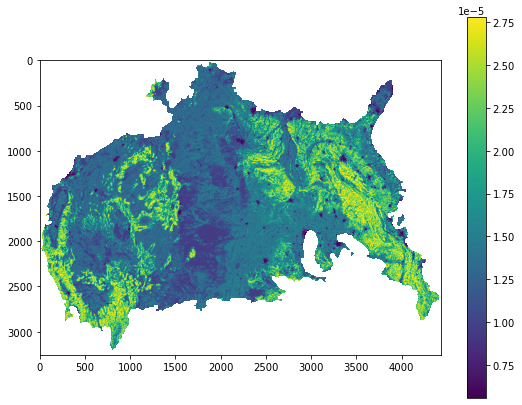

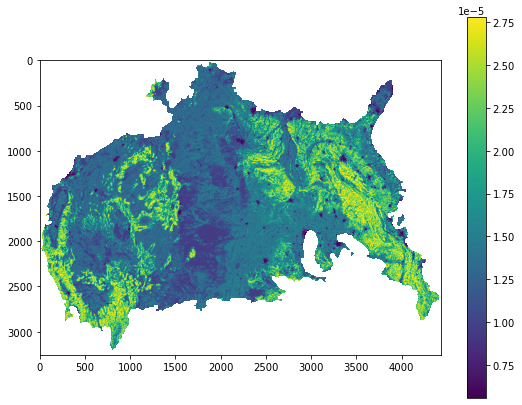

In [9]:
plt.figure(figsize = (9,7))
plt.imshow(og_mannings) #, origin="lower"
plt.colorbar()
# plt.figure(figsize = (9,7))
# plt.imshow(cp_mannings) #, origin="lower"
# plt.colorbar()
plt.figure(figsize = (9,7))
plt.imshow(new_mannings) #, origin="lower"
plt.colorbar()
#plt.title(f'CLM variable {clm_var}, timestep {timestep}')

#### Load in array with indices with high pressures and places we want to increase Mannings

In [10]:
high_press_indices = np.loadtxt('Mannings_Cells_to_Change.csv', skiprows=1, delimiter = ',', dtype = 'int')

In [17]:
# Indices are listed here as [nx, ny]
print(high_press_indices.shape)
#high_press_indices

(75, 2)


In [12]:
# Check some values at indices we will change
# REMEMBER, ARRAYS ARE INDEXED [ny,nx]!!!
print(og_mannings[2552:2555, 2075:2077])
print(new_mannings[2552:2555, 2075:2077])

[[5.56e-06 1.53e-05]
 [1.53e-05 1.53e-05]
 [1.53e-05 8.33e-06]]
[[5.56e-06 1.53e-05]
 [1.53e-05 1.53e-05]
 [1.53e-05 8.33e-06]]


In [13]:
cp_mannings = og_mannings*100
cp_mannings[2552:2555, 2075:2077]

array([[0.000556, 0.00153 ],
       [0.00153 , 0.00153 ],
       [0.00153 , 0.000833]])

In [38]:
print('New Mannings, Original Mannings')
for i in range(75):
    # Replace indices [ny, nx] with the increased mannings values from the copied array
    new_mannings[high_press_indices[i,1],high_press_indices[i,0]] = cp_mannings[high_press_indices[i,1],high_press_indices[i,0]]
    # # Print New and OG
    # print(new_mannings[high_press_indices[i,1],high_press_indices[i,0]],og_mannings[high_press_indices[i,1],high_press_indices[i,0]])

New Mannings, Original Mannings


In [16]:
print(og_mannings[2552:2555, 2075:2077])
print(new_mannings[2552:2555, 2075:2077])

[[5.56e-06 1.53e-05]
 [1.53e-05 1.53e-05]
 [1.53e-05 8.33e-06]]
[[5.56e-06 1.53e-05]
 [1.53e-05 1.53e-03]
 [1.53e-05 8.33e-06]]


#### Save out new Mannings PFB

In [18]:
write_pfb('CONUS2.0.Final1km_mannings_rv50_original_values_Lake_Sink.pfb', new_mannings,dx=1000, dy=1000, dz=200, dist=False)

#### Below is just to test and make sure the new mannings file is correct

In [21]:
test_new_mannings = np.squeeze(pf.read_pfb('CONUS2.0.Final1km_mannings_rv50_original_values_Lake_Sink.pfb'))

In [22]:
test_new_mannings.shape

(3256, 4442)

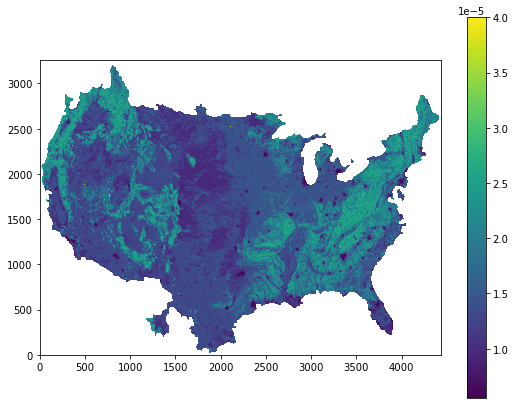

In [31]:
plt.figure(figsize = (9,7))
plt.imshow(test_new_mannings, origin="lower", vmax = 0.00004) # This should be oriented correctly (NOT UPSIDE DOWN)
plt.colorbar()

In [37]:
print(og_mannings[2553, 2076])
print(test_new_mannings[2553, 2076])

1.5300000000000003e-05
0.0015300000000000003
